In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


df = pd.read_excel('/Users/anu/Desktop/My_Personal_Finance.xlsx')
df

,Type,Component,Date,Value,Year
0,Income,Salary,2018-01-01,30000,2018
1,Income,Salary,2018-02-01,30000,2018
2,Income,Salary,2018-03-01,30000,2018
3,Income,Salary,2018-04-01,30000,2018
4,Income,Salary,2018-05-01,30000,2018
...,...,...,...,...,...
439,Expense,Shopping,2020-09-01,2000,2020
440,Expense,Shopping,2020-10-01,2000,2020
441,Expense,Shopping,2020-11-01,2000,2020
442,Expense,Shopping,2020-12-01,3000,2020


In [88]:
# Using y finance library to get the stock data
import yfinance as yf 

# List of stock symbols
stocks = ['MCD', 'AAPL', 'SPY', 'MSFT', 'AMZN']

end_date = datetime.now()# Getting the current data to have it as a end date
start_date = datetime(end_date.year, end_date.month - 1, end_date.day) # Setting start date as month prior

stock_data = {} # To store data for each stock

for stock in stocks: # Using for loop for hourly data from last month
    data = yf.download(stock, start=start_date, end=end_date, interval='1h') 
    stock_data[stock] = data

combined_data = pd.concat(stock_data.values(), keys=stock_data.keys(), axis=1) # Combining all the stock data in a single dataframe

combined_data.columns = [' '.join(col).strip() for col in combined_data.columns.values] # Flattening the data into single level
print(combined_data.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                           MCD Adj Close MCD  MCD Close MCD  MCD High MCD  \
Datetime                                                                    
2024-11-19 14:30:00+00:00         288.970001     288.970001    291.149994   
2024-11-19 15:30:00+00:00         291.165009     291.165009    291.239990   
2024-11-19 16:30:00+00:00         291.274994     291.274994    291.579987   
2024-11-19 17:30:00+00:00         291.429993     291.429993    291.739990   
2024-11-19 18:30:00+00:00         291.170013     291.170013    292.071991   

                           MCD Low MCD  MCD Open MCD  MCD Volume MCD  \
Datetime                                                               
2024-11-19 14:30:00+00:00   287.600006    290.000000          457490   
2024-11-19 15:30:00+00:00   288.839996    288.839996          203549   
2024-11-19 16:30:00+00:00   290.700012    291.209991          202850   
2024-11-19 17:30:00+00:00   291.040009    291.220001          139877   
2024-11-19 18:30:00+00:00   

In [70]:
print("\nDescriptive statistics for combined data: \n")
print(combined_data.describe()) # Describing the combined data


Descriptive statistics for combined data: 

       MCD Adj Close MCD  MCD Close MCD  MCD High MCD  MCD Low MCD  \
count         147.000000     147.000000    147.000000   147.000000   
mean          295.424291     295.424291    296.161437   294.597711   
std             4.016787       4.016787      4.070634     3.997165   
min           285.160004     285.160004    286.429901   283.459991   
25%           292.152496     292.152496    292.815002   291.555008   
50%           296.059998     296.059998    296.600006   295.221405   
75%           298.377502     298.377502    299.088058   297.170013   
max           303.463104     303.463104    303.797089   301.500000   

       MCD Open MCD  MCD Volume MCD  AAPL Adj Close AAPL  AAPL Close AAPL  \
count    147.000000    1.470000e+02           147.000000       147.000000   
mean     295.341571    3.269172e+05           241.099791       241.099791   
std        4.109632    2.197398e+05             8.316226         8.316226   
min      285.000

In [89]:
# Calculating total income and expenses: 

total_income = df[df['Type'] == 'Income']['Value'].sum() # Filering income from 'Type' and summing the corresponding value

total_expenses = df[df['Type'] == 'Expense']['Value'].sum() # Filering expense from 'Type' and summing the corresponding value


print('Total income: ', total_income)
print('Total expense: ', total_expenses)

Total income:  1507500
Total expense:  1182000


In [90]:
# Calculating net income after expenses: 
main_total = total_income - total_expenses
print('Total of net income is: ', main_total)

Total of net income is:  325500


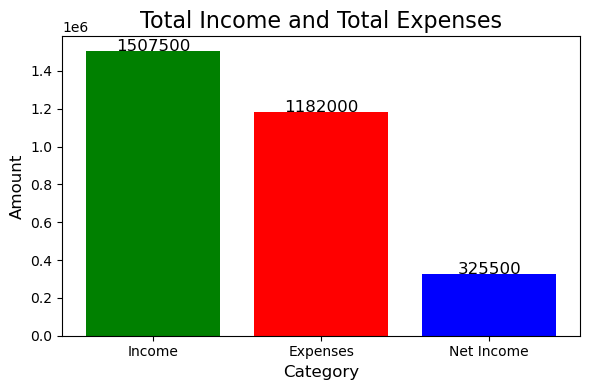

In [94]:
# Visualizing the above data in bar chart
categories = ['Income', 'Expenses', 'Net Income']  # Categories for the bars
values = [total_income, total_expenses, main_total]  # Total income, expenses, and main_total as values
plt.figure(figsize=(6, 4))
plt.bar(categories, values, color=['green', 'red', 'blue'])
plt.title('Total Income and Total Expenses', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Amount', fontsize=12)
for i in range(len(values)):
    plt.text(i, values[i] + 50, str(values[i]), ha='center', fontsize=12)
plt.tight_layout()
plt.show()   

In [74]:
df['Component'].unique() # Getting unique values from component column in the dataframe df

array(['Salary', 'Source 2', 'Mutual funds', 'Emergency Fund',
       'Fixed Deposit', 'Liquid Cash', 'House Rent', 'Groceries & Food',
       'Health', 'EMIs', 'Leisure', 'Shopping'], dtype=object)

In [92]:
# Grouping the component column and summing the corresponding value

summed_values = df.groupby('Component')['Value'].sum() 
print(summed_values)

Component
EMIs                 253000
Emergency Fund        47000
Fixed Deposit         44500
Groceries & Food     286000
Health                73000
House Rent           478000
Leisure               48500
Liquid Cash            1000
Mutual funds         233000
Salary              1384500
Shopping              43500
Source 2             123000
Name: Value, dtype: int64


In [95]:
import yfinance as yf
import pandas as pd

data = {
    'component': ['Salary', 'Source 2', 'Mutual Funds', 'Emergency Fund', 'Fixed Deposit',
                  'Liquid Cash', 'House Rent', 'Groceries & Food', 'Health', 'EMIs', 'Leisure', 'Shopping'],
    'value': [1384500, 123000, 233000, 47000, 44500, 1000, 478000, 286000, 73000, 253000, 48500, 43500]
}

# Creating a dataframe with summed values
df = pd.DataFrame(data)

# Getting data from last year
symbol = "SPY"
ticker = yf.Ticker(symbol)
spy_data = ticker.history(period="1y")  

# Getting percentage return of the S&P 500 (SPY) over the year
spy_start_price = spy_data['Close'][0]  # Price 1 year ago
spy_end_price = spy_data['Close'][-1]  # Latest price
spy_return = (spy_end_price - spy_start_price) / spy_start_price * 100  # Percentage return


source2_value = df[df['component'] == 'Source 2']['value'].values[0]  # Getting the source2 value from df

# Calculating the growth of Source2 if it were invested in SPY (1-year return)
source2_growth = source2_value * (1 + spy_return / 100)  # Simulated salary growth


print(f"Source 2 growth if invested in SPY: ${source2_growth:.2f}")

Source 2 growth if invested in SPY: $153981.36


/var/folders/yr/65__8pcx0cq8d23hh2blbnc40000gn/T/ipykernel_3299/2908961690.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  spy_start_price = spy_data['Close'][0]  # Price 1 year ago
/var/folders/yr/65__8pcx0cq8d23hh2blbnc40000gn/T/ipykernel_3299/2908961690.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  spy_end_price = spy_data['Close'][-1]  # Latest price


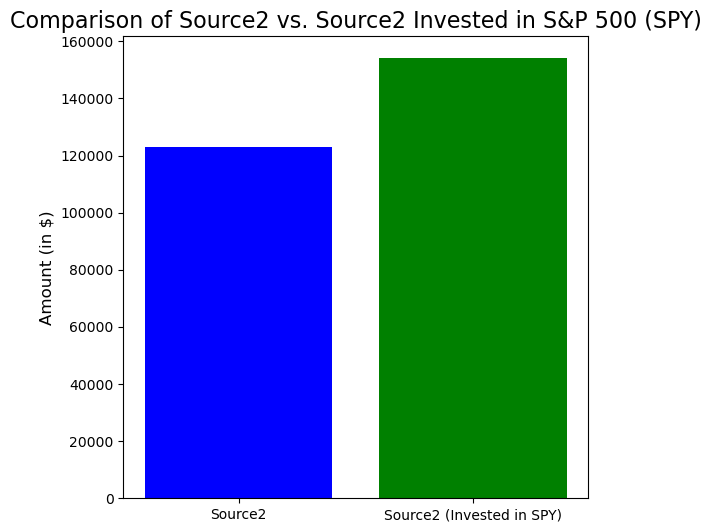

In [79]:
import matplotlib.pyplot as plt

# Plot the comparison
plt.figure(figsize=(6, 6))

# Plot Salary vs SPY returns
plt.bar(['Source2', 'Source2 (Invested in SPY)'], [source2_value, source2_growth], color=['blue', 'green'])

plt.title('Comparison of Source2 vs. Source2 Invested in S&P 500 (SPY)', fontsize=16)
plt.ylabel('Amount (in $)', fontsize=12)
plt.show()


In [43]:
pip install polygon-api-client


Note: you may need to restart the kernel to use updated packages.


In [61]:
# Tried getting the historical data from polygon API but it needs a special subscription to access that data

from polygon import RESTClient
import config
import json
from typing import cast
from urllib3 import HTTPResponse

client = RESTClient(config.API_KEY)

aggs = cast(
    HTTPResponse,
    client.get_aggs(
        'SPY',
        1,
        'day',
        '2022-05-20',
        '2022-11-11',
        raw=True
        ),
    
    )

data = json.loads(aggs.data)

for item in data:
    if item == 'results':
        rawData = data[item]

closeList = []

for bar in rawData:
    for category in bar:
        if category == 'c':
            closeList.append(bar[category])

print(closeList)

BadResponse: {"status":"NOT_AUTHORIZED","request_id":"da6e80a11ac0c1f619f861ea32092c5c","message":"Your plan doesn't include this data timeframe. Please upgrade your plan at https://polygon.io/pricing"}

In [101]:
# Showing how beneficial it is to invest in SPY
ticker = "SPY" 

spy_data = yf.Ticker(ticker).history(period="1y")  # Fetch data for the past 1 year

# Calculate the percentage return of SPY over the past year
spy_start_price = spy_data['Close'][0]  # Closing price 1 year ago
spy_end_price = spy_data['Close'][-1]  # Latest closing price
spy_return = (spy_end_price - spy_start_price) / spy_start_price * 100  # Percentage return

initial_investment = 10000 # Assuming 10000 investment a year ago


investment_value = initial_investment * (1 + spy_return / 100) #Invested value today

print(f"SPY Start Price (1 year ago): ${spy_start_price:.2f}")
print(f"SPY End Price (latest): ${spy_end_price:.2f}")
print(f"1-Year Return on SPY: {spy_return:.2f}%")
print(f"Investment of $10,000 in SPY one year ago is now worth: ${investment_value:.2f}")


SPY Start Price (1 year ago): $470.40
SPY End Price (latest): $588.42
1-Year Return on SPY: 25.09%
Investment of $10,000 in SPY one year ago is now worth: $12508.82


/var/folders/yr/65__8pcx0cq8d23hh2blbnc40000gn/T/ipykernel_3299/3483298763.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  spy_start_price = spy_data['Close'][0]  # Closing price 1 year ago
/var/folders/yr/65__8pcx0cq8d23hh2blbnc40000gn/T/ipykernel_3299/3483298763.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  spy_end_price = spy_data['Close'][-1]  # Latest closing price
